In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.metrics import precision_score, recall_score, roc_auc_score, plot_roc_curve

In [2]:
from yellowbrick.datasets import load_credit

c:\programas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
dataset = load_credit()

In [4]:
X = dataset[0]
y = dataset[1]

In [6]:
X.head()

,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,...,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [7]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

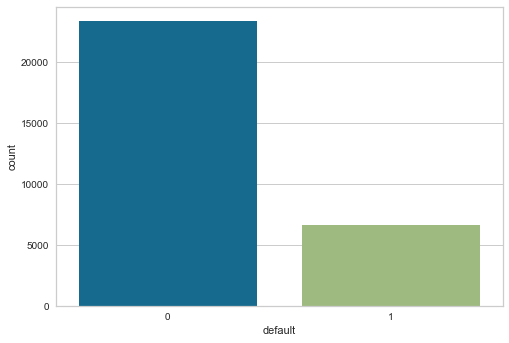

In [8]:
import seaborn as sns
sns.countplot(y)

In [9]:
y.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(24000, 23)

In [13]:
X_test.shape

(6000, 23)

In [14]:
# Standardize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
from sklearn.metrics import plot_roc_curve

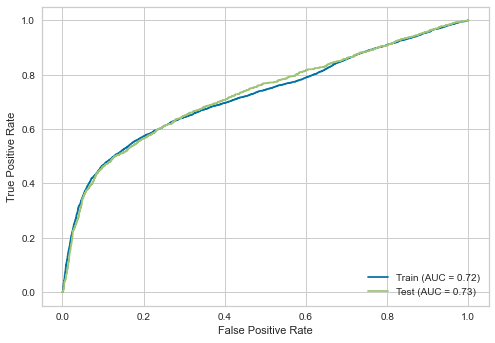

In [17]:
fig, ax = plt.subplots()

plot_roc_curve(logistic, X_train, y_train, ax=ax, name='Train')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Test')


In [18]:
logistic.coef_[0]

array([-0.1064992 , -0.05615191, -0.0776404 , -0.07913785,  0.0768645 ,
        0.64895949,  0.10850917,  0.07761239,  0.05278847,  0.0207935 ,
        0.0164151 , -0.36936606,  0.14097374,  0.10535014, -0.05706456,
        0.0420411 ,  0.02191146, -0.17542131, -0.24655131, -0.02528229,
       -0.05626986, -0.02168945, -0.04814077])

In [19]:
pd.DataFrame(zip(logistic.coef_[0], X.columns), columns=['coef','variables']).sort_values(by='coef')

,coef,variables
11,-0.369366,apr_bill
18,-0.246551,may_pay
17,-0.175421,apr_pay
0,-0.106499,limit
3,-0.079138,married
2,-0.077640,edu
14,-0.057065,jul_bill
20,-0.056270,jul_pay
1,-0.056152,sex
22,-0.048141,sep_pay


# KNN - K Nearest Neighbors

In [29]:
from mlxtend.plotting import plot_decision_regions

In [20]:
from sklearn.datasets import make_classification

X_fake, y_fake = make_classification(n_samples=5500, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0,
                           weights=[0.8, 0.2],
                           random_state=3)

In [21]:
X_fake = pd.DataFrame(X_fake, columns=['feature_1','feature_2'])
y_fake = pd.Series(y_fake, name='target')
X_fake.head()

,feature_1,feature_2
0,-1.490236,0.854707
1,-1.886211,-0.077779
2,-1.643407,0.947921
3,-0.016212,-2.254958
4,-0.845402,-1.173690


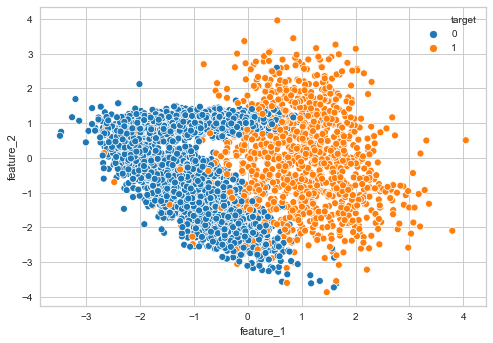

In [22]:
sns.scatterplot(X_fake.loc[:,'feature_1'], X_fake.loc[:,'feature_2'], hue=y_fake, palette='tab10')

# Splitting into train and test dataframes

In [23]:
X_fake_train, X_fake_test, y_fake_train, y_fake_test = train_test_split(X_fake, y_fake, test_size=0.2, random_state=42)

In [24]:
scaler_fake = StandardScaler()
scaler_fake.fit(X_fake_train)
X_fake_train_std = scaler_fake.transform(X_fake_train)

X_fake_test_std = scaler_fake.transform(X_fake_test)

## Logistic would use a straight line to separate groups

In [71]:
logistic = LogisticRegression()
logistic.fit(X_fake_train_std, y_fake_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
logistic.intercept_

array([-2.92889976])

In [73]:
logistic.coef_

array([[3.54734757, 0.32412739]])

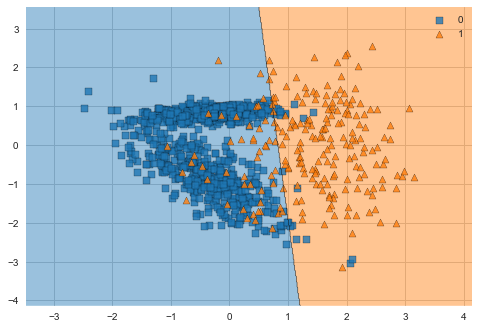

In [74]:
plot_decision_regions(np.array(X_fake_test_std), np.array(y_fake_test), logistic)

## KNN: K-Nearest Neighbors

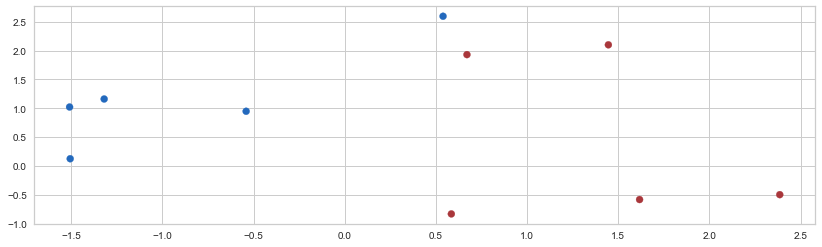

In [32]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(1, figsize=(14,4))
mini_sample = X_fake_train.sample(10, random_state=4)

ax.scatter(mini_sample.iloc[:, 0], mini_sample.iloc[:, 1], c=y_fake_train.loc[mini_sample.index], cmap='vlag')

Text(0.5, 1.0, 'K = 5')

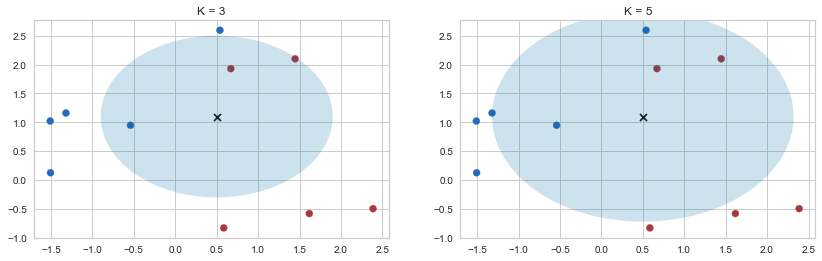

In [33]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(1, 2, figsize=(14,4))
mini_sample = X_fake_train.sample(10, random_state=4)

ax[0].scatter(mini_sample.iloc[:, 0], mini_sample.iloc[:, 1], c=y_fake_train.loc[mini_sample.index], cmap='vlag')
test_point = (0.5, 1.1)
ax[0].scatter(test_point[0], test_point[1], marker='x', c='k')
p1 = Circle(test_point, 1.4, alpha=.2)
ax[0].add_artist(p1)
ax[0].set_title('K = 3')

ax[1].scatter(mini_sample.iloc[:, 0], mini_sample.iloc[:, 1], c=y_fake_train.loc[mini_sample.index], cmap='vlag')
test_point = (0.5, 1.1)
ax[1].scatter(test_point[0], test_point[1], marker='x', c='k')
p1 = Circle(test_point, 1.82, alpha=.2)
ax[1].add_artist(p1)
ax[1].set_title('K = 5')

Text(0.5, 1.0, 'K = 5')

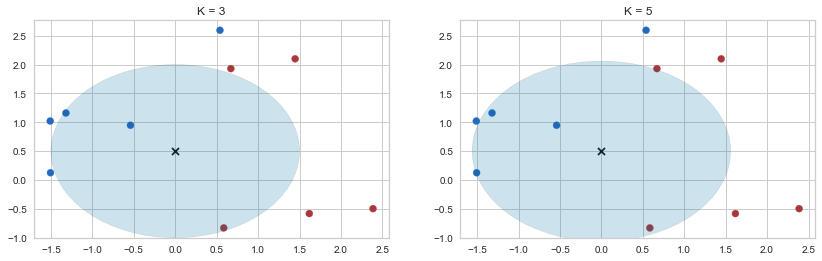

In [34]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(1, 2, figsize=(14,4))
mini_sample = X_fake_train.sample(10, random_state=4)

ax[0].scatter(mini_sample.iloc[:, 0], mini_sample.iloc[:, 1], c=y_fake_train.loc[mini_sample.index], cmap='vlag')
test_point = (.0, 0.5)
ax[0].scatter(test_point[0], test_point[1], marker='x', c='k')
p1 = Circle(test_point, 1.5, alpha=.2, edgecolor='k')
ax[0].add_artist(p1)
ax[0].set_title('K = 3')


ax[1].scatter(mini_sample.iloc[:, 0], mini_sample.iloc[:, 1], c=y_fake_train.loc[mini_sample.index], cmap='vlag')
test_point = (.0, 0.5)
ax[1].scatter(test_point[0], test_point[1], marker='x', c='k')
p1 = Circle(test_point, 1.56, alpha=.2, edgecolor='k')
ax[1].add_artist(p1)
ax[1].set_title('K = 5')

In [36]:
y_fake_train.mean()

0.205

In [ ]:
# TODO: create interactive visualization calculating the distance to the K-nearest neighbors (using kd-tree maybe) and automatically generating the radius of the circle

## KNN Decision Boundary for different number of neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier()

knn.fit(X_fake_train, y_fake_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

c:\programas\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
c:\programas\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


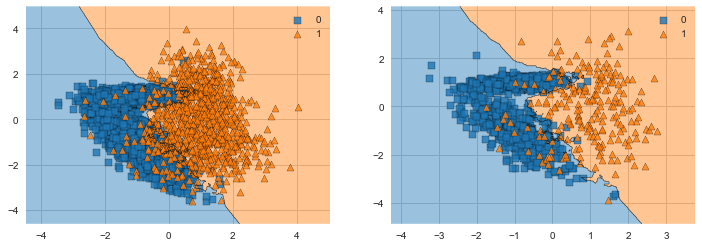

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_decision_regions(np.array(X_fake_train), np.array(y_fake_train), knn , ax= ax[0])
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), knn , ax= ax[1])

In [41]:
knn.predict_proba(X_fake_test)

array([[0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       ...,
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ]])

In [44]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_fake_train, y_fake_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [47]:
np.unique(knn.predict_proba(X_fake_test)[:, 1])

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])

In [49]:
import warnings
warnings.simplefilter("ignore")

Text(0.5, 1.0, 'K = 200')

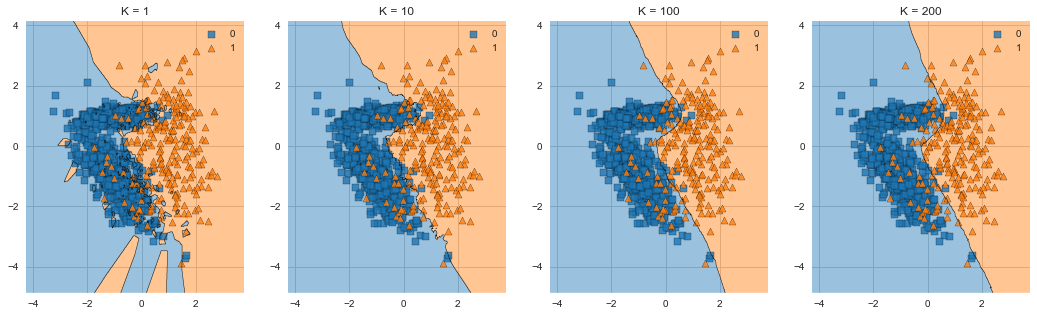

In [50]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_100 = KNeighborsClassifier(n_neighbors=100)
knn_200 = KNeighborsClassifier(n_neighbors=200)

knn_1.fit(X_fake_train, y_fake_train)
knn_10.fit(X_fake_train, y_fake_train)
knn_100.fit(X_fake_train, y_fake_train)
knn_200.fit(X_fake_train, y_fake_train)

fig, ax = plt.subplots(1, 4, figsize=(18, 5))
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), knn_1 , ax= ax[0])
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), knn_10 , ax= ax[1])
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), knn_100 , ax= ax[2])
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), knn_200 , ax= ax[3])

ax[0].set_title('K = 1')
ax[1].set_title('K = 10')
ax[2].set_title('K = 100')
ax[3].set_title('K = 200')

Increasing K $\to$ higher bias

Decreasing K $\to$ higher variance

In [52]:
from sklearn.metrics import roc_auc_score

In [53]:
X_fake_train.shape

(4400, 2)

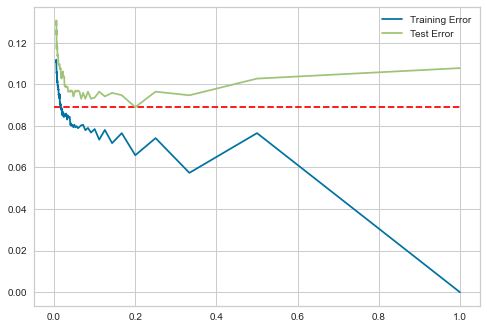

In [54]:
from tqdm.auto import tqdm

complexity = []
error_test = []
error_train = []

for K in tqdm(range(1, 200)):
    complexity.append(1/K)
    
    knn = KNeighborsClassifier(n_neighbors = K)
    knn.fit(X_fake_train, y_fake_train)
    error_train.append(1 - roc_auc_score(y_fake_train, knn.predict(X_fake_train)))
    error_test.append(1 - roc_auc_score(y_fake_test, knn.predict(X_fake_test)))
    

plt.plot(complexity, error_train, '-', label='Training Error')
plt.plot(complexity, error_test, '-', label='Test Error')
plt.hlines(min(error_test), 0, 1, colors='red', linestyles='dashed')
plt.legend()

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
pd.DataFrame(X)

,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,...,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [78]:
knn.predict_proba(X_test)[:, 1]

array([0.2, 0. , 0.2, ..., 0. , 0. , 0. ])

In [84]:
#logistic = LogisticRegression()
#logistic.fit(X_train, y_train)

In [85]:
#fig, ax = plt.subplots()

#plot_roc_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
#plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')


In [86]:
knn_fake = KNeighborsClassifier(n_neighbors=5)
knn_fake.fit(X_fake_train_std, y_fake_train)

logistic_fake = LogisticRegression()
logistic_fake.fit(X_fake_train_std, y_fake_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

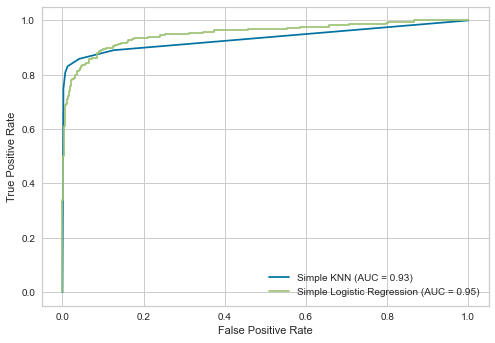

In [87]:

fig, ax = plt.subplots()

plot_roc_curve(knn_fake, X_fake_test_std, y_fake_test, ax=ax, name='Simple KNN')
plot_roc_curve(logistic_fake, X_fake_test_std, y_fake_test, ax=ax, name='Simple Logistic Regression')


## You can change the number of neighbors used

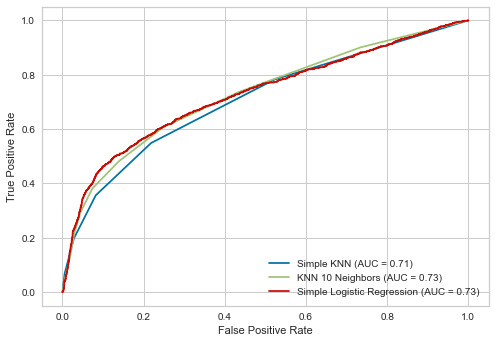

In [88]:
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train)

knn_10.predict_proba(X_test)[:, 1]

fig, ax = plt.subplots()

plot_roc_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
plot_roc_curve(knn_10, X_test, y_test, ax=ax, name='KNN 10 Neighbors')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')

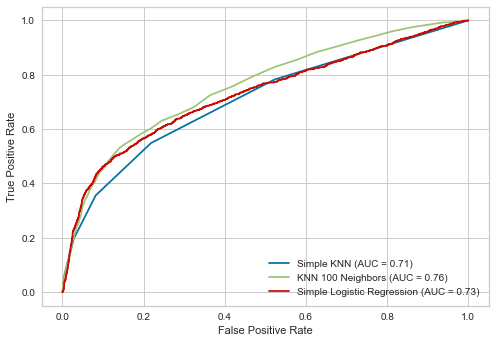

In [89]:
knn_100 = KNeighborsClassifier(n_neighbors=100)
knn_100.fit(X_train, y_train)

knn_100.predict_proba(X_test)[:, 1]

fig, ax = plt.subplots()

plot_roc_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
plot_roc_curve(knn_100, X_test, y_test, ax=ax, name='KNN 100 Neighbors')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')

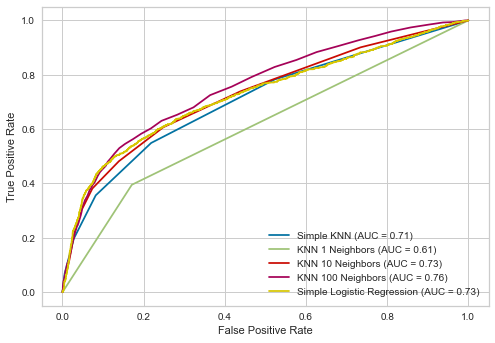

In [90]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)

knn_1.predict_proba(X_test)[:, 1]

fig, ax = plt.subplots()

plot_roc_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
plot_roc_curve(knn_1, X_test, y_test, ax=ax, name='KNN 1 Neighbors')
plot_roc_curve(knn_10, X_test, y_test, ax=ax, name='KNN 10 Neighbors')
plot_roc_curve(knn_100, X_test, y_test, ax=ax, name='KNN 100 Neighbors')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')

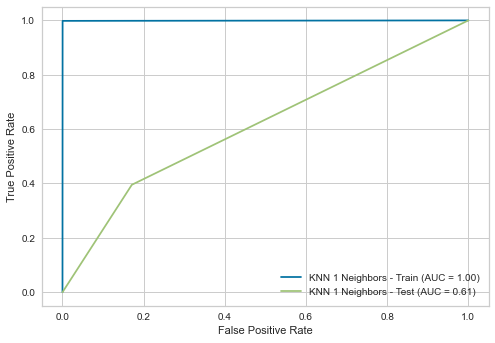

In [91]:
fig, ax = plt.subplots()

plot_roc_curve(knn_1, X_train, y_train, ax=ax, name='KNN 1 Neighbors - Train')
plot_roc_curve(knn_1, X_test, y_test, ax=ax, name='KNN 1 Neighbors - Test')

In [95]:
knn_fake_1 = KNeighborsClassifier(n_neighbors=1)
knn_fake_1.fit(X_fake_train_std, y_fake_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [99]:
X_fake_train_std.shape

(4400, 2)

In [98]:
X_fake_test_std.shape

(1100, 2)

In [100]:
y_fake_train.shape

(4400,)

In [101]:
y_fake_test.shape

(1100,)

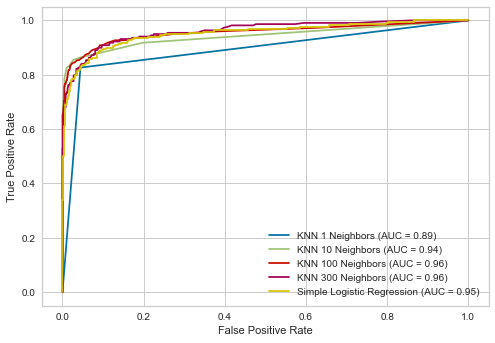

In [106]:
knn_fake_1 = KNeighborsClassifier(n_neighbors=1)
knn_fake_1.fit(X_fake_train_std, y_fake_train)

knn_fake_10 = KNeighborsClassifier(n_neighbors=10)
knn_fake_10.fit(X_fake_train_std, y_fake_train)

knn_fake_100 = KNeighborsClassifier(n_neighbors=100)
knn_fake_100.fit(X_fake_train_std, y_fake_train)

knn_fake_300 = KNeighborsClassifier(n_neighbors=300)
knn_fake_300.fit(X_fake_train_std, y_fake_train)


logistic_fake = LogisticRegression()
logistic_fake.fit(X_fake_train_std, y_fake_train)
fig, ax = plt.subplots()

plot_roc_curve(knn_fake_1, X_fake_test_std, y_fake_test, ax=ax, name='KNN 1 Neighbors')
plot_roc_curve(knn_fake_10, X_fake_test_std, y_fake_test, ax=ax, name='KNN 10 Neighbors')
plot_roc_curve(knn_fake_100, X_fake_test_std, y_fake_test, ax=ax, name='KNN 100 Neighbors')
plot_roc_curve(knn_fake_300, X_fake_test_std, y_fake_test, ax=ax, name='KNN 300 Neighbors')
plot_roc_curve(logistic_fake, X_fake_test_std, y_fake_test, ax=ax, name='Simple Logistic Regression')

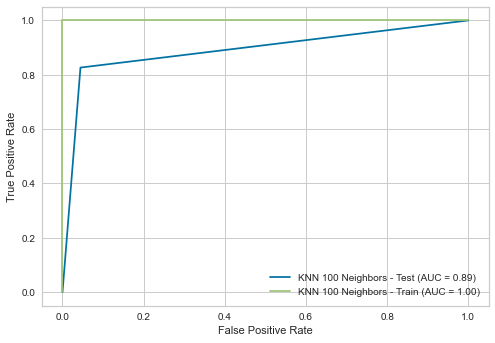

In [115]:
fig, ax = plt.subplots()
plot_roc_curve(knn_fake_1, X_fake_test_std, y_fake_test, ax=ax, name='KNN 100 Neighbors - Test')
plot_roc_curve(knn_fake_1, X_fake_train_std, y_fake_train, ax=ax, name='KNN 100 Neighbors - Train')

## You can weight observations by the inverse of the distance

In [116]:
knn_dist = KNeighborsClassifier(n_neighbors=100, weights='distance')
knn_dist.fit(X_train, y_train)

knn_dist.predict_proba(X_test)[:, 1]

array([0.23788364, 0.0266836 , 0.09704301, ..., 0.17038641, 0.13642223,
       0.09987845])

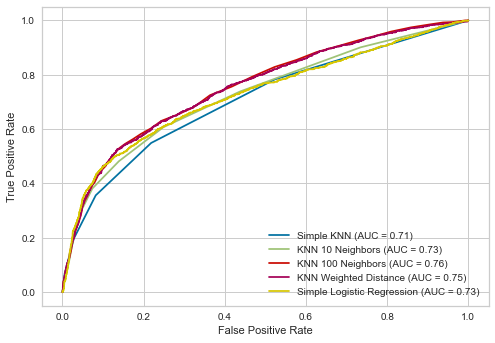

In [117]:
fig, ax = plt.subplots()

plot_roc_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
plot_roc_curve(knn_10, X_test, y_test, ax=ax, name='KNN 10 Neighbors')
plot_roc_curve(knn_100, X_test, y_test, ax=ax, name='KNN 100 Neighbors')
plot_roc_curve(knn_dist, X_test, y_test, ax=ax, name='KNN Weighted Distance')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')


## You can specify different metrics

In [118]:
# p=1 MANHATTAN, or CITYBLOCK
# p=1 EUCLIDEAN DISTANCE

knn_manhattan = KNeighborsClassifier(n_neighbors=10, weights='distance', p=1, n_jobs=-1) 
knn_manhattan.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=1,
                     weights='distance')

In [ ]:
KNeighborsClassifier(metric=)

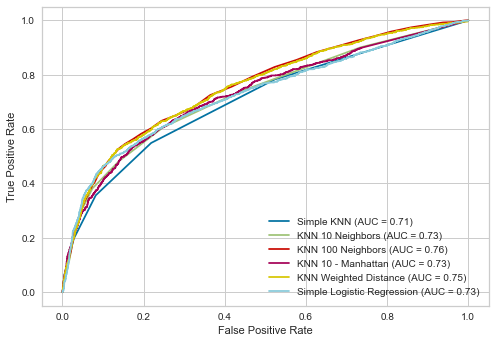

In [119]:
fig, ax = plt.subplots()

plot_roc_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
plot_roc_curve(knn_10, X_test, y_test, ax=ax, name='KNN 10 Neighbors')
plot_roc_curve(knn_100, X_test, y_test, ax=ax, name='KNN 100 Neighbors')
plot_roc_curve(knn_manhattan, X_test, y_test, ax=ax, name='KNN 10 - Manhattan')
plot_roc_curve(knn_dist, X_test, y_test, ax=ax, name='KNN Weighted Distance')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')

# Decision Trees

In [124]:
from sklearn.tree import DecisionTreeClassifier

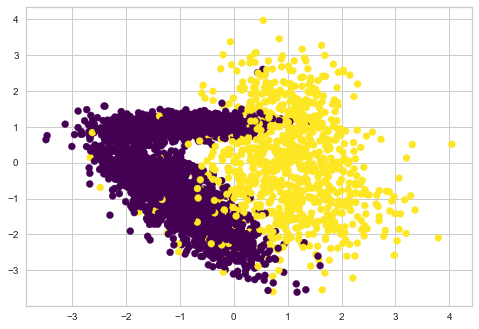

In [123]:
plt.scatter(X_fake_train.feature_1, X_fake_train.feature_2, c=y_fake_train, cmap='viridis')

In [125]:
tree = DecisionTreeClassifier()
tree.fit(X_fake_train, y_fake_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

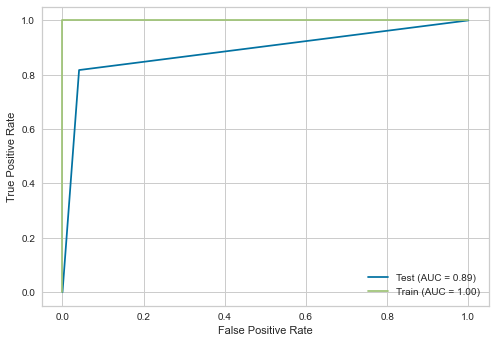

In [126]:
fig, ax= plt.subplots()
plot_roc_curve(tree, X_fake_test, y_fake_test, name='Test', ax=ax)
plot_roc_curve(tree, X_fake_train, y_fake_train, name='Train', ax=ax)

In [127]:
from sklearn.tree import plot_tree

In [129]:
X_fake_train

,feature_1,feature_2
4315,2.434897,-1.753752
1832,-2.039200,0.736151
3819,-1.720234,0.067654
957,-1.260037,-0.445162
3545,-2.063751,0.734676
...,...,...
3772,-1.047143,1.060261
5191,-0.444509,-1.212619
5226,-1.187000,-0.584520
5390,-1.391984,0.479200


In [130]:
y_fake_train

4315    1
1832    0
3819    0
957     0
3545    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: target, Length: 4400, dtype: int32

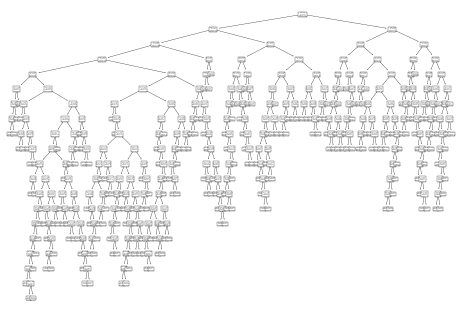

In [128]:
plot_tree(tree);

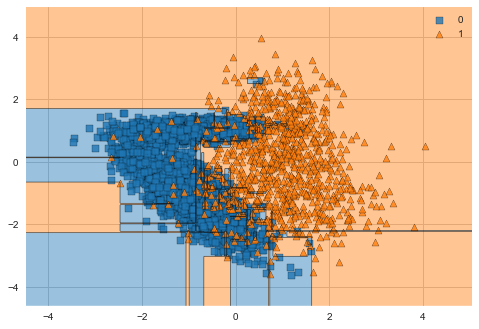

In [131]:
plot_decision_regions(np.array(X_fake_train), np.array(y_fake_train), tree)

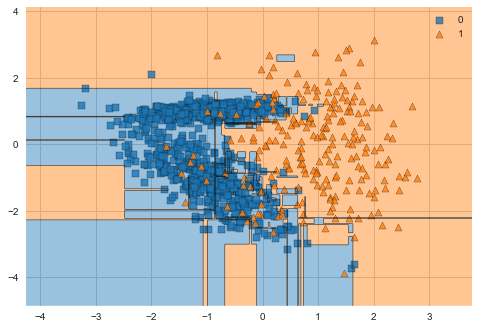

In [132]:
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), tree)

In [ ]:
DecisionTreeClassifier()

## Some theory

## Gini Index

$$ G = \sum_{k=0}^{1} \hat{p}_{mk} \left(1  - \hat{p}_{mk} \right) \to \text{node purity}$$

$\hat{p}_{mk}$ is the proportion of training observations that falls into the $m$-th leaf, from the $k$-th class.

For example, if the proportion of observations is random, that is, there are ~50% observations from y=1, and ~50% observations from y=0, the Gini Index would be: 
$$ G = 0.5 \cdot (1-0.5) = 0.25 $$

If, on the other hand, when you see a leaf of the tree, you get 90% from target=1 and 10% from target=0, you would have:

$$ G = 0.9 \cdot (1 - 0.9) = 0.09 $$

Text(0, 0.5, 'Gini Index')

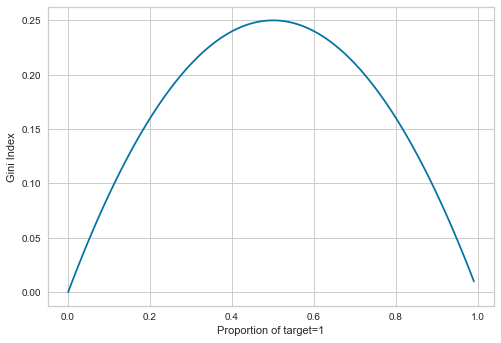

In [133]:
plt.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01) * (1 - np.arange(0, 1, 0.01)))
plt.xlabel('Proportion of target=1')
plt.ylabel('Gini Index')

## Entropy 

$$ D = - \sum_{k=1}^2\hat{p}_{mk}log\left( \hat{p}_{mk} \right) $$

Text(0, 0.5, 'Gini Index')

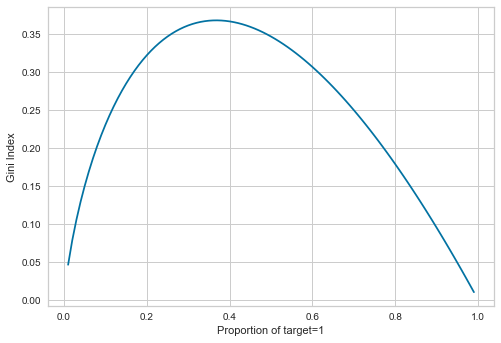

In [134]:
plt.plot(np.arange(0, 1, 0.01), - np.arange(0, 1, 0.01) * np.log(np.arange(0, 1, 0.01)))
plt.xlabel('Proportion of target=1')
plt.ylabel('Gini Index')

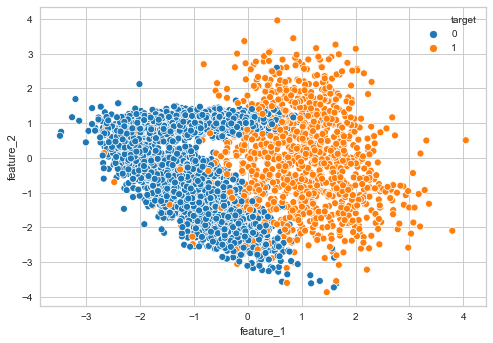

In [135]:
sns.scatterplot(X_fake.loc[:,'feature_1'], X_fake.loc[:,'feature_2'], hue=y_fake, palette='tab10')

In [136]:
tree = DecisionTreeClassifier()
tree.fit(X_fake_train, y_fake_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

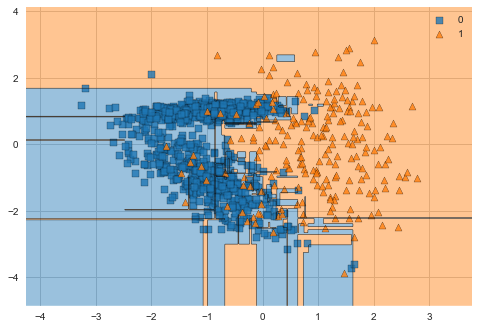

In [137]:
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), tree)

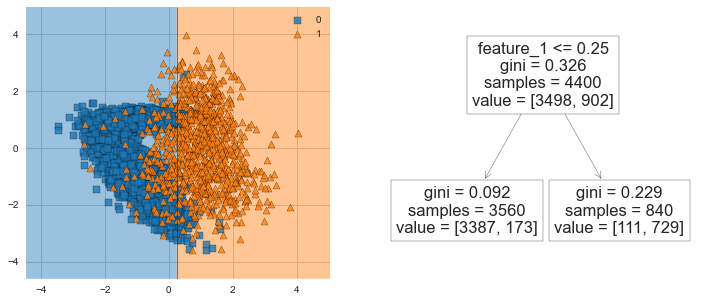

In [138]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_fake_train, y_fake_train)
plot_decision_regions(np.array(X_fake_train), np.array(y_fake_train), tree, ax=ax[0])
plot_tree(tree, ax=ax[1], feature_names=X_fake.columns,  );

In [139]:
729/840

0.8678571428571429

In [140]:
173/3560

0.04859550561797753

In [142]:
tree.predict_proba(X_fake_train)[:, 1][:10]

array([0.86785714, 0.04859551, 0.04859551, 0.04859551, 0.04859551,
       0.04859551, 0.86785714, 0.86785714, 0.86785714, 0.04859551])

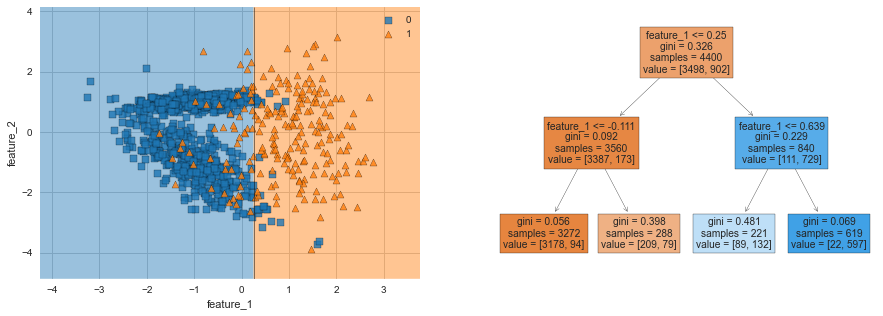

In [143]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_fake_train, y_fake_train)

plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), tree, ax=ax[0])
ax[0].set_xlabel('feature_1')
ax[0].set_ylabel('feature_2')

plot_tree(tree, ax=ax[1], feature_names=X_fake_test.columns, filled=True);

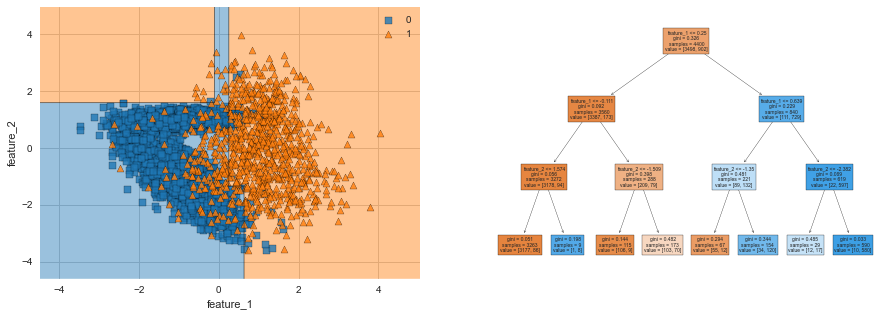

In [148]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_fake_train, y_fake_train)
plot_decision_regions(np.array(X_fake_train), np.array(y_fake_train), tree, ax=ax[0])
ax[0].set_xlabel('feature_1')
ax[0].set_ylabel('feature_2')

plot_tree(tree, ax=ax[1], feature_names=X_fake_test.columns, filled=True);

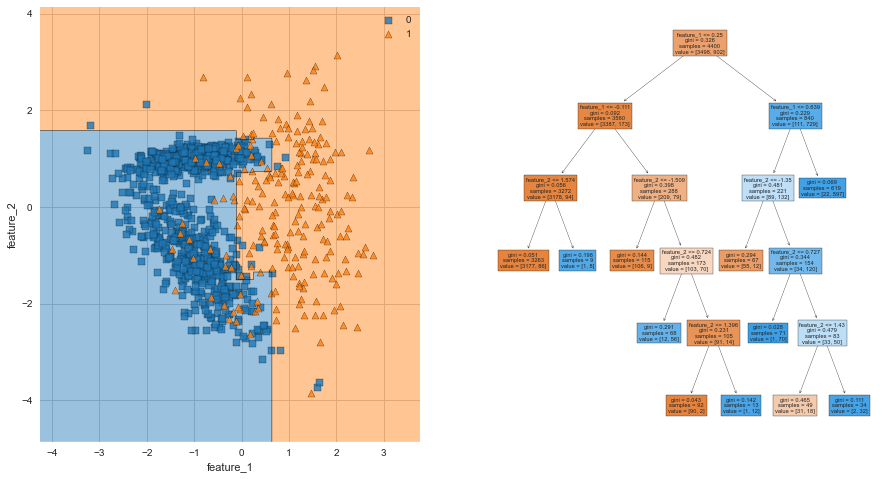

In [149]:
# Regularization Intro:

fig, ax = plt.subplots(1, 2, figsize=(15,8))

tree = DecisionTreeClassifier(ccp_alpha=0.002)
tree.fit(X_fake_train, y_fake_train)
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), tree, ax=ax[0])
ax[0].set_xlabel('feature_1')
ax[0].set_ylabel('feature_2')

plot_tree(tree, ax=ax[1], feature_names=X_fake_test.columns, filled=True);

In [150]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [151]:
tree_ccp = DecisionTreeClassifier(ccp_alpha=0.002)
tree_ccp.fit(X_train_, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

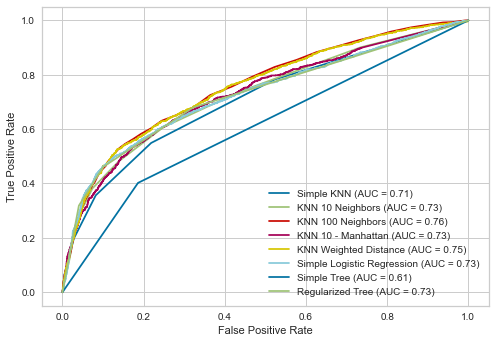

In [152]:
fig, ax = plt.subplots()

plot_roc_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
plot_roc_curve(knn_10, X_test, y_test, ax=ax, name='KNN 10 Neighbors')
plot_roc_curve(knn_100, X_test, y_test, ax=ax, name='KNN 100 Neighbors')
plot_roc_curve(knn_manhattan, X_test, y_test, ax=ax, name='KNN 10 - Manhattan')
plot_roc_curve(knn_dist, X_test, y_test, ax=ax, name='KNN Weighted Distance')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')
plot_roc_curve(tree, X_test, y_test, ax=ax, name='Simple Tree')
plot_roc_curve(tree_ccp, X_test, y_test, ax=ax, name='Regularized Tree')



In [153]:
tree = DecisionTreeClassifier()
tree.fit(X_fake_train_std, y_fake_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [154]:
tree_ccp = DecisionTreeClassifier(ccp_alpha=0.002)
tree_ccp.fit(X_fake_train_std, y_fake_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

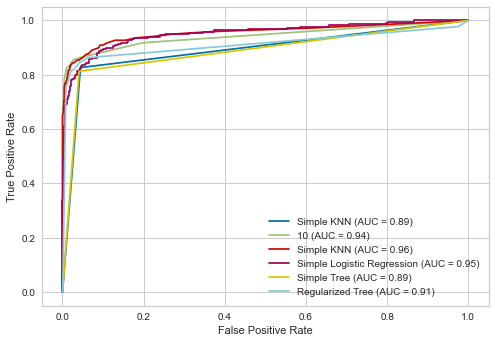

In [155]:
fig, ax = plt.subplots()

plot_roc_curve(knn_fake_1, X_fake_test_std, y_fake_test, ax=ax, name='Simple KNN')
plot_roc_curve(knn_fake_10, X_fake_test_std, y_fake_test, ax=ax, name='10')
plot_roc_curve(knn_fake_100, X_fake_test_std, y_fake_test, ax=ax, name='Simple KNN')
plot_roc_curve(logistic_fake, X_fake_test_std, y_fake_test, ax=ax, name='Simple Logistic Regression')
plot_roc_curve(tree, X_fake_test_std, y_fake_test, ax=ax, name='Simple Tree')
plot_roc_curve(tree_ccp, X_fake_test_std, y_fake_test, ax=ax, name='Regularized Tree')



In [157]:
from sklearn.metrics import plot_precision_recall_curve

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 23 

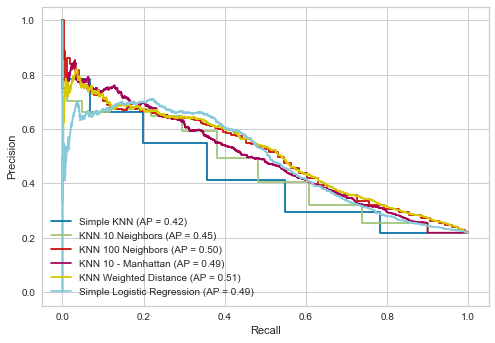

In [158]:
fig, ax = plt.subplots()

plot_precision_recall_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
plot_precision_recall_curve(knn_10, X_test, y_test, ax=ax, name='KNN 10 Neighbors')
plot_precision_recall_curve(knn_100, X_test, y_test, ax=ax, name='KNN 100 Neighbors')
plot_precision_recall_curve(knn_manhattan, X_test, y_test, ax=ax, name='KNN 10 - Manhattan')
plot_precision_recall_curve(knn_dist, X_test, y_test, ax=ax, name='KNN Weighted Distance')
plot_precision_recall_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')
#plot_precision_recall_curve(tree, X_test, y_test, ax=ax, name='Simple Tree')
#plot_precision_recall_curve(tree_ccp, X_test, y_test, ax=ax, name='Regularized Tree')



# Feature Importance in Decision Trees

In [159]:
tree_ccp.feature_importances_

array([0.87280873, 0.12719127])

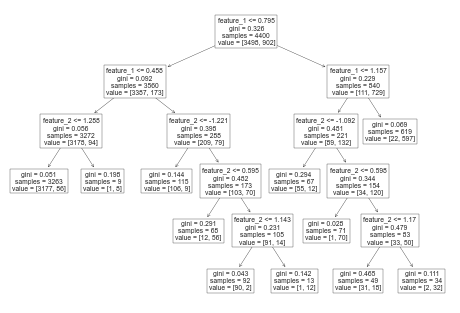

In [160]:
plot_tree(tree_ccp, feature_names=X_fake.columns);

In [162]:
pd.DataFrame(zip(X_fake.columns, tree_ccp.feature_importances_))

,0,1
0,feature_1,0.872809
1,feature_2,0.127191


## Standardization?

Useless

## Outlier?

Small Effect